In [10]:
#Modify the .gitignore File (gitstatus in commandline) (6.2.7)

In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#Whhen you zip something up you are zipping it up as a tuple that can be accessed by the index 0 or 1! 

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the list of tuples and find the nearest city to those coordinates.

In [14]:
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=81e237fae0d701a13197f06dc4bc3d55


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
      # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | yerbogachen
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | huancabamba
Processing Record 10 of Set 1 | rincon
Processing Record 11 of Set 1 | pishin
Processing Record 12 of Set 1 | gisborne
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | kitoy
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | tazovskiy
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | aguimes
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of S

Processing Record 33 of Set 4 | coquimbo
Processing Record 34 of Set 4 | flinders
Processing Record 35 of Set 4 | san cristobal
Processing Record 36 of Set 4 | aykhal
Processing Record 37 of Set 4 | sao domingos
Processing Record 38 of Set 4 | frutigen
Processing Record 39 of Set 4 | dien bien
City not found. Skipping...
Processing Record 40 of Set 4 | tevriz
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | prince rupert
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | douentza
Processing Record 45 of Set 4 | nizhniy kuranakh
Processing Record 46 of Set 4 | jashpurnagar
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | scharding
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | hervey bay
Processing Record 3 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 4 of Set 5 | meadow lake
Processing Record 5 of 

Processing Record 25 of Set 8 | jalingo
Processing Record 26 of Set 8 | yei
Processing Record 27 of Set 8 | cuamba
Processing Record 28 of Set 8 | brumado
Processing Record 29 of Set 8 | ust-charyshskaya pristan
Processing Record 30 of Set 8 | ostrovnoy
Processing Record 31 of Set 8 | rimini
Processing Record 32 of Set 8 | carutapera
Processing Record 33 of Set 8 | ilebo
Processing Record 34 of Set 8 | cambridge
Processing Record 35 of Set 8 | aasiaat
Processing Record 36 of Set 8 | aborlan
Processing Record 37 of Set 8 | torbay
Processing Record 38 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 39 of Set 8 | lixourion
Processing Record 40 of Set 8 | maues
Processing Record 41 of Set 8 | haibowan
City not found. Skipping...
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | dikson
Processing Record 44 of Set 8 | halalo
City not found. Skipping...
Processing Record 45 of Set 8 | kalmunai
Processing Record 46 of Set 8 | aklavik
Processing Record 

Processing Record 14 of Set 12 | dracena
Processing Record 15 of Set 12 | zhezkazgan
Processing Record 16 of Set 12 | awbari
Processing Record 17 of Set 12 | bontang
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 12 | ahipara
Processing Record 21 of Set 12 | mackenzie
Processing Record 22 of Set 12 | balimo
City not found. Skipping...
Processing Record 23 of Set 12 | porto belo
Processing Record 24 of Set 12 | baykit
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | selfoss
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | uchiza
Processing Record 29 of Set 12 | bela
Processing Record 30 of Set 12 | iganga
Processing Record 31 of Set 12 | marsh harbour
Processing Record 32 of Set 12 | potosi
Processing Record 33 of Set 12 | kangaba
Processing Record 34 of Set 12 | highland springs
Processing Record 35 of Set 12 | fuente de oro
Processing Record 36 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.70,83,88,22.82,PF,2020-10-24 21:31:48
1,Vardo,70.37,31.11,39.45,76,100,22.59,NO,2020-10-24 21:31:49
2,Mataura,-46.19,168.86,73.00,56,94,17.00,NZ,2020-10-24 21:31:49
3,Bredasdorp,-34.53,20.04,64.40,82,1,11.41,ZA,2020-10-24 21:31:50
4,Yerbogachen,61.28,108.01,23.38,97,100,3.38,RU,2020-10-24 21:31:50
5,Touros,-5.20,-35.46,78.80,83,40,9.17,BR,2020-10-24 21:31:50
6,Huancabamba,-5.24,-79.45,63.84,70,90,3.69,PE,2020-10-24 21:31:51
7,Rincon,32.30,-81.24,82.40,58,40,11.41,US,2020-10-24 21:31:51
8,Pishin,30.58,67.00,39.43,68,0,1.57,PK,2020-10-24 21:31:51
9,Gisborne,-38.65,178.00,73.00,58,0,5.01,NZ,2020-10-24 21:29:52


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-24 21:31:48,-23.12,-134.97,74.70,83,88,22.82
1,Vardo,NO,2020-10-24 21:31:49,70.37,31.11,39.45,76,100,22.59
2,Mataura,NZ,2020-10-24 21:31:49,-46.19,168.86,73.00,56,94,17.00
3,Bredasdorp,ZA,2020-10-24 21:31:50,-34.53,20.04,64.40,82,1,11.41
4,Yerbogachen,RU,2020-10-24 21:31:50,61.28,108.01,23.38,97,100,3.38
...,...,...,...,...,...,...,...,...,...
587,Portsmouth,GB,2020-10-24 21:35:56,50.80,-1.09,55.00,94,100,1.99
588,Kiboga,UG,2020-10-24 21:35:56,0.92,31.77,63.72,96,31,1.05
589,Atasu,KZ,2020-10-24 21:35:57,48.68,71.64,31.12,78,90,13.47
590,Umm Lajj,SA,2020-10-24 21:35:57,25.02,37.27,83.26,34,0,8.30


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603575427.189868

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

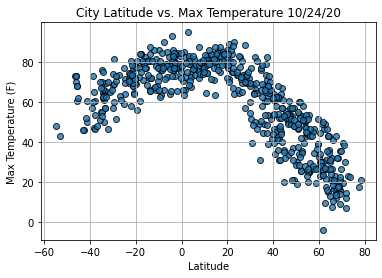

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

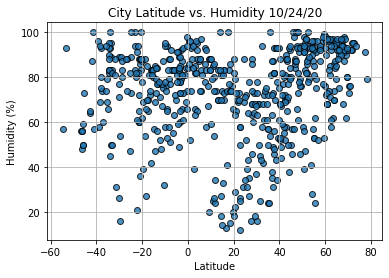

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

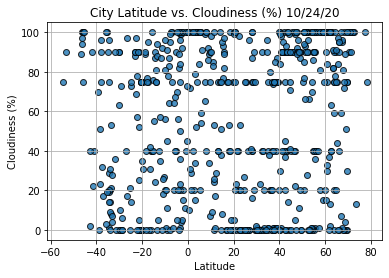

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

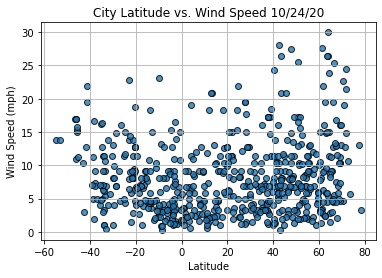

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy import stats
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
#The syntax to get a specific row from a current DataFrame is
index13 = city_data_df.loc[13]
index13

City                    Ketchikan
Country                        US
Date          2020-10-24 21:22:22
Lat                         55.34
Lng                       -131.65
Max Temp                     44.6
Humidity                       24
Cloudiness                      1
Wind Speed                   5.82
Name: 13, dtype: object

In [32]:
#We can also filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
587     True
588     True
589     True
590     True
591     True
Name: Lat, Length: 592, dtype: bool

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

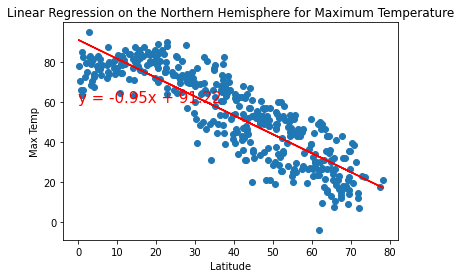

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,60))

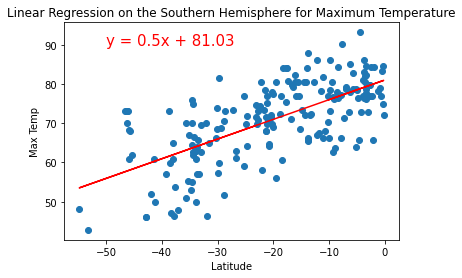

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

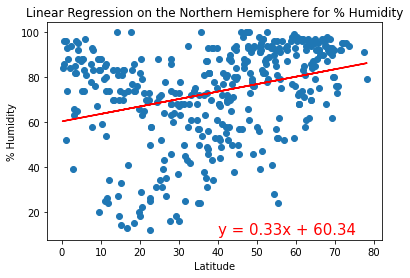

In [36]:
# 4.6.3
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

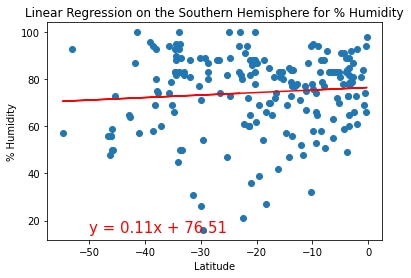

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Linear Regression on the Southern Hemisphere for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

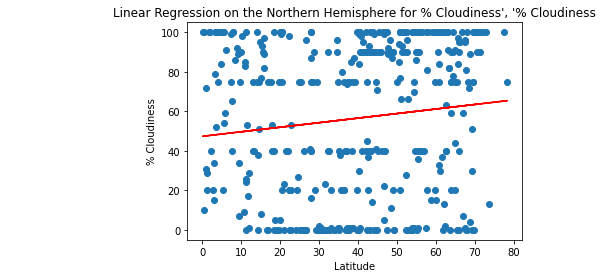

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

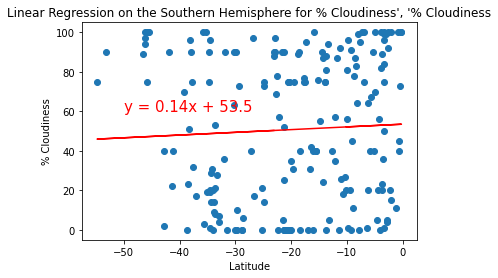

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

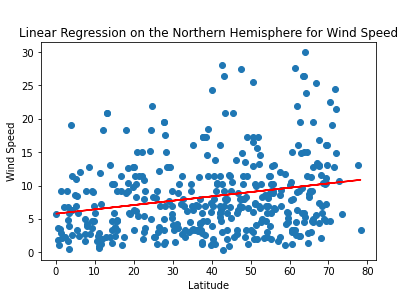

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

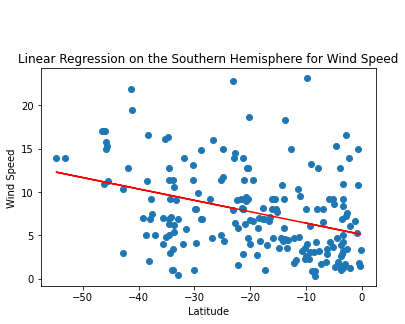

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,30))

In [3]:
import requests
url = "https://api.spacexdata.com/v2/launchpads"
print(url)

https://api.spacexdata.com/v2/launchpads
